In [158]:
from TTS.utils.synthesizer import Synthesizer
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [159]:
tts_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/model_file.pth"
tts_config_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/config.json"
speakers_file_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/speaker_ids.json"

In [160]:
# Define text, model name, speaker index, and output path
text = "hello world; this is an example sentence"
speaker_idx = "p225"
out_path = "out.wav"

In [161]:


# Initialize the synthesizer
synthesizer = Synthesizer(
        tts_checkpoint=tts_path,
        tts_config_path=tts_config_path,
        tts_speakers_file=speakers_file_path,
        use_cuda=False,
    )



 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [162]:
synthesizer.tts_model.speaker_manager.speaker_names[:4]

['ED\n', 'p225', 'p226', 'p227']

In [163]:
output = synthesizer.tts(text=text,speaker_name="p225",return_extra_outputs=True)
Audio(output[0], rate=22050)

 > Text splitted to sentences.
['hello; world; this; is; an; example; sentence.']
 > Processing time: 1.0996458530426025
 > Real-time factor: 0.26903061267962664


In [164]:
output[1]['outputs']

{'model_outputs': tensor([[[ 0.0042,  0.0040,  0.0040,  ..., -0.0016, -0.0017, -0.0019]]]),
 'alignments': tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 1., 1., 1.]]]),
 'durations': tensor([[[ 3.,  3.,  2.,  3.,  1.,  3.,  4.,  4.,  5.,  1.,  1.,  2.,  6.,  3.,
            6.,  1.,  4.,  3.,  1.,  2.,  1.,  1.,  2.,  1.,  3.,  3.,  1.,  3.,
            2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  6.,  2.,  1.,  2.,  6.,  2.,
            1.,  5.,  3.,  2.,  1.,  1.,  6.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,
            5.,  1.,  2.,  6.,  2.,  1.,  6.,  2.,  2.,  3.,  1.,  2.,  1.,  3.,
            2.,  5.,  2.,  2.,  4.,  3.,  2.,  1.,  2.,  2.,  3.,  2.,  6.,  2.,
           14.,  2.,  3.,  1.,  1.,  3.,  2.,  2.,  1.,  4.,  1.,  5.,  7.,  1.,
            4.,  9.,  5.,  6.,  9., 10.,  9.

In [165]:
tokens = synthesizer.tts_model.tokenizer.text_to_ids(text)
pre_tokenized_text_blnk = [synthesizer.tts_model.tokenizer.decode([y]) for y in tokens]
# replace <blnk> with space
pre_tokenized_text = [x if x != '<BLNK>' else '_' for x in pre_tokenized_text_blnk]
space_indices = [i for i, phoneme in enumerate(pre_tokenized_text) if phoneme == ' ']
space_indices = [0] + space_indices
space_indices


[0, 15, 31, 43, 53, 63, 85]

In [166]:
phoneme_durations = output[1]['outputs']['durations'].squeeze()
phoneme_timestamps = np.cumsum(phoneme_durations.squeeze())
phoneme_durations



tensor([ 3.,  3.,  2.,  3.,  1.,  3.,  4.,  4.,  5.,  1.,  1.,  2.,  6.,  3.,
         6.,  1.,  4.,  3.,  1.,  2.,  1.,  1.,  2.,  1.,  3.,  3.,  1.,  3.,
         2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  6.,  2.,  1.,  2.,  6.,  2.,
         1.,  5.,  3.,  2.,  1.,  1.,  6.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,
         5.,  1.,  2.,  6.,  2.,  1.,  6.,  2.,  2.,  3.,  1.,  2.,  1.,  3.,
         2.,  5.,  2.,  2.,  4.,  3.,  2.,  1.,  2.,  2.,  3.,  2.,  6.,  2.,
        14.,  2.,  3.,  1.,  1.,  3.,  2.,  2.,  1.,  4.,  1.,  5.,  7.,  1.,
         4.,  9.,  5.,  6.,  9., 10.,  9.])

In [167]:
word_timestamps = []
start_idx = 0
word_timestamps = [float(phoneme_timestamps[space_idx]) for space_idx in space_indices]
word_timestamps[0] = 0.0

word_timestamps

[0.0, 48.0, 80.0, 111.0, 134.0, 164.0, 230.0]

In [168]:
# zip pre_tokenized_text and phoneme_timestamps
paired_tokens_timestamps = list(zip(pre_tokenized_text, phoneme_timestamps))
paired_tokens_timestamps[:14]

[('_', tensor(3.)),
 ('h', tensor(6.)),
 ('_', tensor(8.)),
 ('ə', tensor(11.)),
 ('_', tensor(12.)),
 ('l', tensor(15.)),
 ('_', tensor(19.)),
 ('ˈ', tensor(23.)),
 ('_', tensor(28.)),
 ('o', tensor(29.)),
 ('_', tensor(30.)),
 ('ʊ', tensor(32.)),
 ('_', tensor(38.)),
 (',', tensor(41.))]

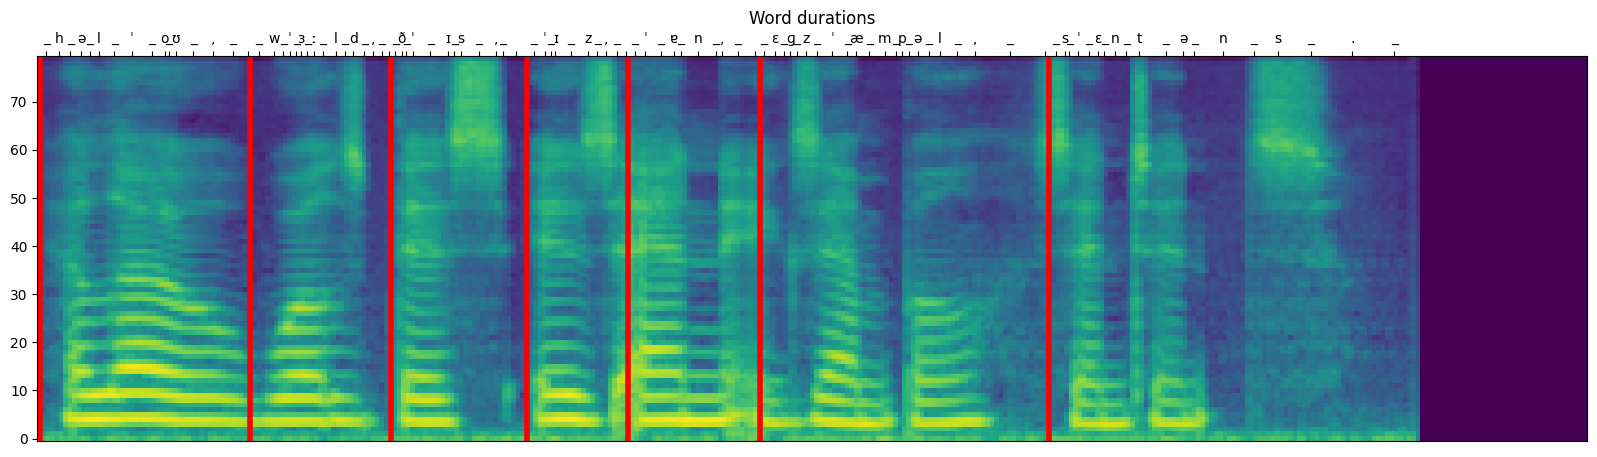

In [169]:
# plot the spectrogram
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))

# plot the spectrogram with xticks
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))
plt.figure(figsize=(20,5))
plt.imshow(spec, origin="lower", aspect='auto', interpolation='none')
# create labels at the xticks
# plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()), pre_tokenized_text, rotation=0)
# shift the xticks to the middle of the bins
plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()[0][0]) - output[1]["outputs"]["durations"].cpu().numpy()[0][0] / 2, pre_tokenized_text, rotation=0)
# draw a vertical line for each token
for x in word_timestamps:
    plt.axvline(x, color="red", linewidth=4)

plt.gca().xaxis.tick_top()
plt.title("Word durations")
plt.show()

In [170]:
new_durations = output[1]['outputs']['durations'].clone()

stretch_factor = 20

for space_index in space_indices:
    new_durations[0][0][space_index] *= stretch_factor

output2 = synthesizer.tts(text=text,speaker_name="p225",return_extra_outputs=True,durations=new_durations[0])
Audio(output2[0], rate=22050)

 > Text splitted to sentences.
['hello; world; this; is; an; example; sentence.']
 > Processing time: 2.0545430183410645
 > Real-time factor: 0.2777805451929049


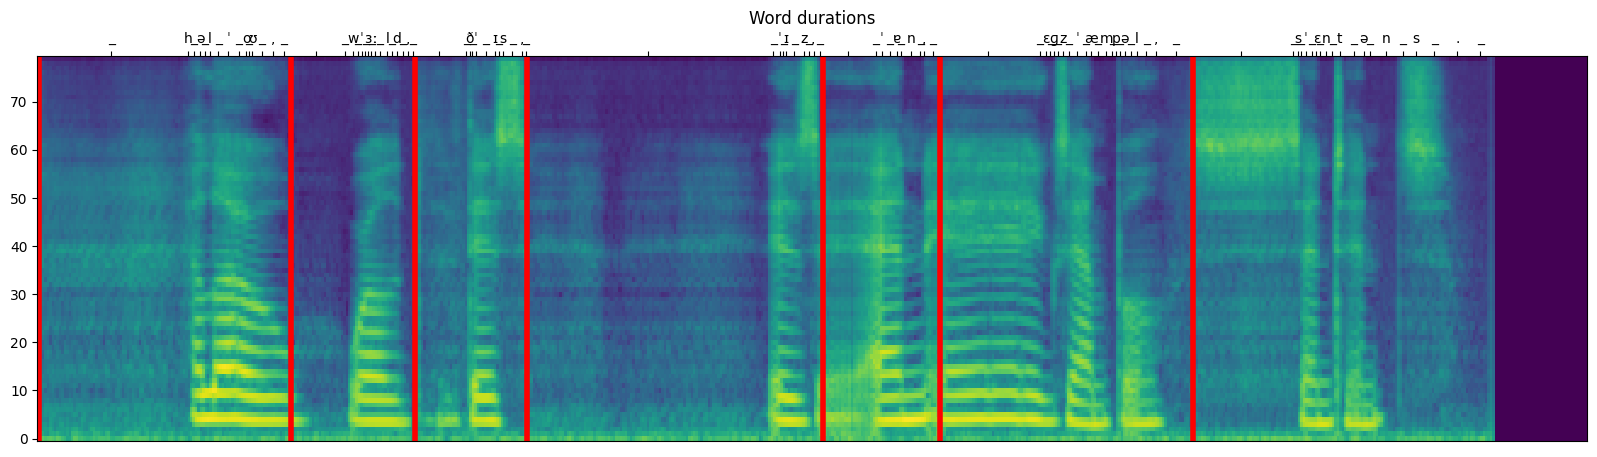

In [171]:
new_timestamps = np.cumsum(new_durations.squeeze())

new_word_timestamps = [float(new_timestamps[space_idx - 1]) for space_idx in space_indices]
new_word_timestamps[0] = 0.0

new_word_timestamps
# plot the spectrogram
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output2[0]))

# plot the spectrogram with xticks
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output2[0]))
plt.figure(figsize=(20,5))
plt.imshow(spec, origin="lower", aspect='auto', interpolation='none')
# create labels at the xticks
# plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()), pre_tokenized_text, rotation=0)
# shift the xticks to the middle of the bins
plt.xticks(np.cumsum(output2[1]["outputs"]["durations"].cpu().numpy()[0][0]) - output2[1]["outputs"]["durations"].cpu().numpy()[0][0] / 2, pre_tokenized_text, rotation=0)
# draw a vertical line for each token
for x in new_word_timestamps:
    plt.axvline(x, color="red", linewidth=4)

plt.gca().xaxis.tick_top()
plt.title("Word durations")
plt.show()